In [61]:
#importing necessary libraries and modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#loading and execuing the csv file for train and test
df=pd.read_csv("train_wn75k28.csv")
df_test=pd.read_csv("test_Wf7sxXF.csv")
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [63]:
#check for null values
df.isna().sum()
df_test.isna().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [64]:
df_test['products_purchased'].describe()

count    5048.000000
mean        2.108954
std         0.783483
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: products_purchased, dtype: float64

In [65]:
#modifying the null valus of products purchased column to mode valueof exisitng ones
df['products_purchased']=df['products_purchased'].fillna(df['products_purchased'].mode()[0])


In [66]:
#necessary correction of date type object variable at created at and signup date
#converting this type of feature into number of days by subtracting from present to min date value
df['created_at']=pd.to_datetime(df['created_at'])
df['created_at'] = (df['created_at'] - df['created_at'].min())  / np.timedelta64(1,'D')
df['signup_date']=pd.to_datetime(df['signup_date'])
df['signup_date'] = (df['signup_date'] - df['signup_date'].min())  / np.timedelta64(1,'D')


df_test['created_at']=pd.to_datetime(df_test['created_at'])
df_test['created_at'] = (df_test['created_at'] - df_test['created_at'].min())  / np.timedelta64(1,'D')
df_test['signup_date']=pd.to_datetime(df_test['signup_date'])
df_test['signup_date'] = (df_test['signup_date'] - df_test['signup_date'].min())  / np.timedelta64(1,'D')


In [67]:
#converting signup date null values as zero.
#cannot omit the data as the number of rows are huge
df['signup_date']=df['signup_date'].fillna(0)

In [68]:
df.isna().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

In [69]:
df_test['products_purchased']=df_test['products_purchased'].fillna(df_test['products_purchased'].mode()[0])
df_test['signup_date']=df_test['signup_date'].fillna(0)

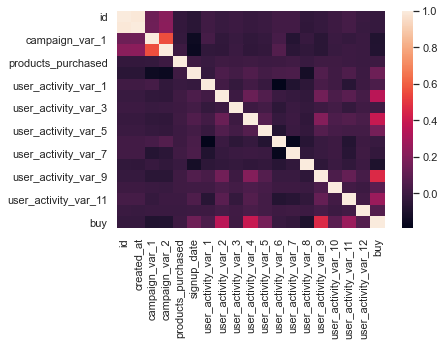

In [70]:
#check for correlation by applying a heatmap on it
sns.heatmap(df.corr())

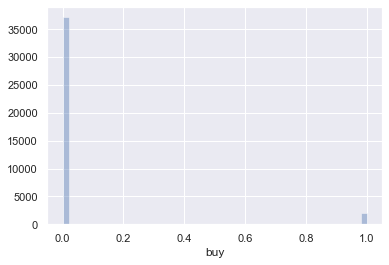

In [71]:
#check for imbalance 
#seen that it is highly imbalanced
sns.distplot(df.buy,kde=False)

In [72]:
#Categorizing the X and y variables for training
X=df.iloc[:,:-1]
y=df['buy']

In [74]:
#importing necessary statistical models for machine learning analysis
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,KFold

In [75]:
#importing smotetomek for balancing the data set
from imblearn.combine import SMOTETomek

In [76]:
#new data set generated with balance data
os=SMOTETomek(0.70)
X_ns, y_ns=os.fit_sample(X,y)

In [77]:
#applying weighted random forest classifier for analysis
from sklearn.ensemble import RandomForestClassifier
weight={0:1,1:30}
classifier=RandomForestClassifier(class_weight=weight)
classifier.fit(X_ns,y_ns)

RandomForestClassifier(class_weight={0: 1, 1: 30})

In [78]:
#Prediction of output from test data set
y_pred=classifier.predict(df_test)

In [79]:
#converting into useful format as per sample
submissions_1=pd.DataFrame(columns=['id','buy'], index=None)
submissions_1['buy']=y_pred
submissions_1['id']=df_test['id']
submissions_1.head()

,id,buy
0,39162,0
1,39163,0
2,39164,0
3,39165,0
4,39166,0


In [80]:
#converting into .csv file for submission into local directory
from pathlib import Path  
filepath = Path('folder/ss21.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
submissions_1.to_csv(filepath, index=False)